In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import copy, time, sys
import random
import pickle
from tqdm import tqdm

import mlrfit as mf
from mlrfit.hodlr_methods import build_hodlr, get_hodlr_storage

/Users/parshakova.tanya/opt/anaconda3/envs/routing/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(1001)
random.seed(1001)

In [3]:
kerns =  {"exp2": lambda r: np.exp(-r**2),\
          "exp1": lambda r: np.exp(-r),\
          "quad": lambda r: np.power((1 + r**2), -2),\
          "inv_quad": lambda r: np.power((1 + r**2), -1)}
grref_max_iters = 5000

In [4]:
m = n = 5000
# La = 3
# kern_type = "inv_quad"
# d = 3
# sigma = 0.6

d = 3
sigma = 0.9
La = 3
kern_type = "quad"

A, Dist = mf.radial_kernel_matrix(d, sigma, n, La, kerns[kern_type])
symm = False
num_levels = int(np.ceil(np.log2(min(m, n))) + 1)
hpart = mf.hpart_dist_clustering(Dist, num_levels, symm=symm, grref_max_iters=grref_max_iters)
A = A[hpart['rows']['pi'], :][:, hpart['cols']['pi']]
Dist = Dist[hpart['rows']['pi'], :][:, hpart['cols']['pi']]

(array([ 512155, 1531082, 2549980, 3569310, 4591775, 5615185, 6630513]), array([4.01496962e-04, 2.86058423e-01, 5.71715349e-01, 8.57372275e-01,
       1.14302920e+00, 1.42868613e+00, 1.71434305e+00, 1.99999998e+00]))


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [7]:
mtype  = "radkern_%s_allL"%kern_type
filename = "%s_%d"%(mtype, n)

with open('../outputs/disthpart_%s.pickle'%filename, 'wb') as handle:
    pickle.dump(hpart, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
Kls = [A]
for l in range(La):
    Kls += [kerns[kern_type](Dist / (sigma / 2**(1+l-1)))]

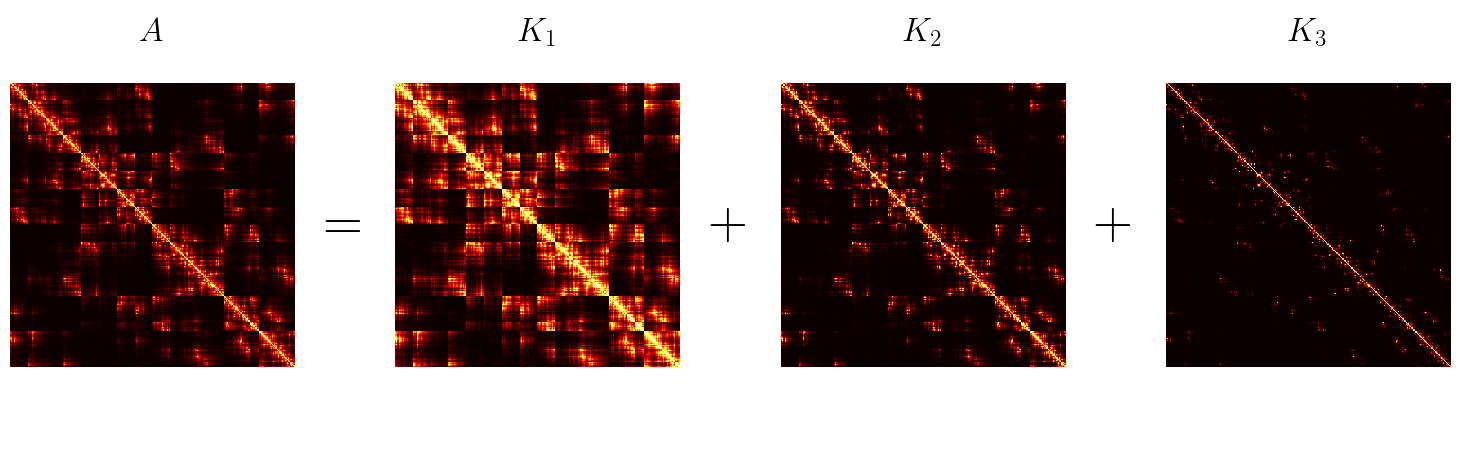

In [27]:
plt.rcParams['text.usetex'] = True

plt.rcdefaults()

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 20,
    })

fig, axs = plt.subplots(1, 7, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 0.1, 1, 0.1, 1, 0.1, 1]})
fig.subplots_adjust(wspace=0.)


for i in range(7):
    if i % 2 == 0:
        axs[i].matshow(Kls[i // 2], cmap='hot')
        if i == 0: name = r"$A$"
        else: name = r"$K_%d$"%(i // 2)
        axs[i].set_title(name)
    else:
        if i == 1: sign = r"$=$"
        else: sign = r"$+$"
        axs[i].text(0.5, 0.5, sign, ha='center', va='center', fontsize=40)
    axs[i].axis('off')

plt.tight_layout()
plt.savefig("%s_decomposition.pdf"%filename, bbox_inches='tight')

In [25]:
nbits = (10**5)*50*2 * 64
nbytes = nbits / 8
nbytes / 2**30

0.07450580596923828

In [26]:
nbits = (10**5)**2 * 64
nbytes = nbits / 8
nbytes / 2**30

74.50580596923828

(array([ 512155, 1531082, 2549980, 3569310, 4591775, 5615185, 6630513]), array([4.01496962e-04, 2.86058423e-01, 5.71715349e-01, 8.57372275e-01,
       1.14302920e+00, 1.42868613e+00, 1.71434305e+00, 1.99999998e+00]))


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


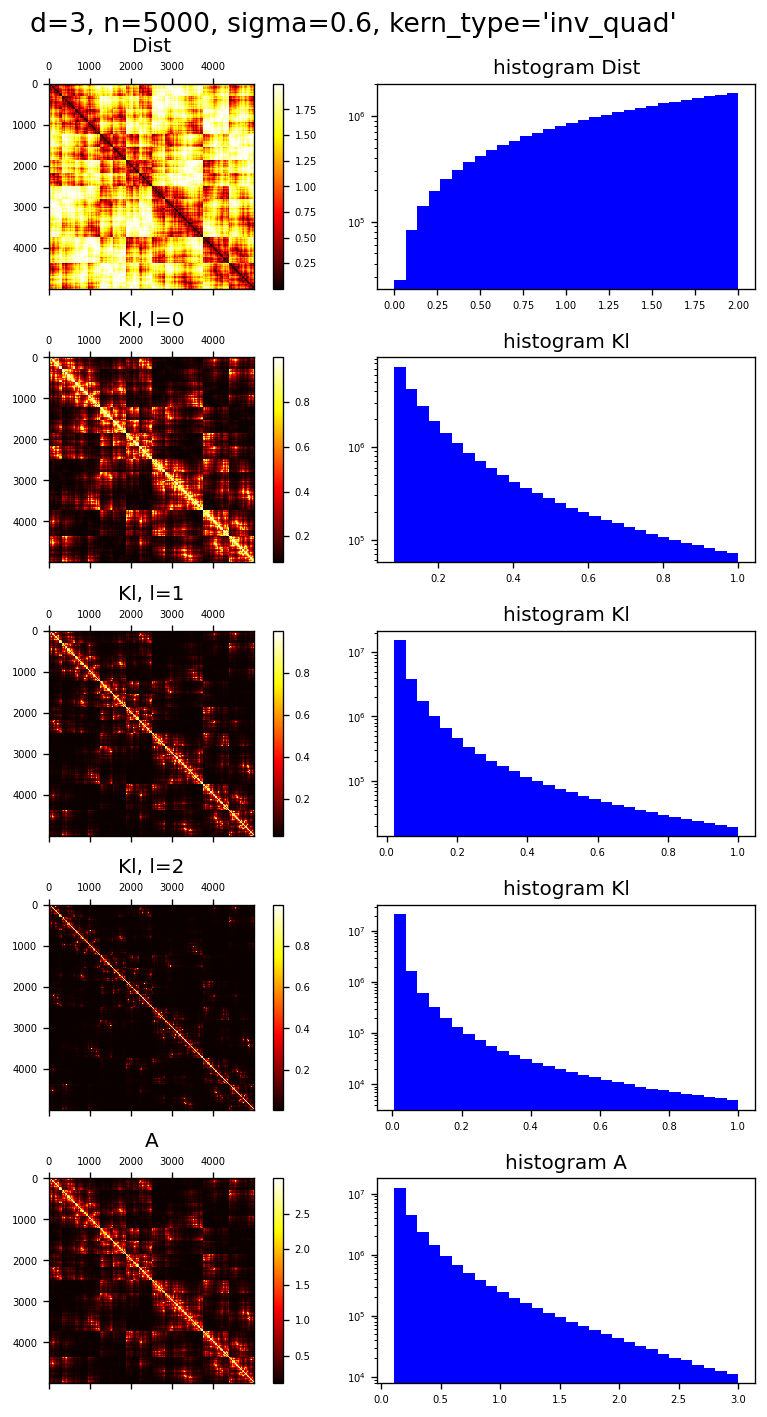

In [ ]:
mf.plot_hist_rad_kern_matrices(A, Dist, La, kerns[kern_type], kern_type, d, n, sigma)

(array([ 509117, 1529019, 2550749, 3573568, 4591318, 5612009, 6634220]), array([1.86376143e-04, 2.85874031e-01, 5.71561685e-01, 8.57249340e-01,
       1.14293699e+00, 1.42862465e+00, 1.71431230e+00, 1.99999996e+00]))


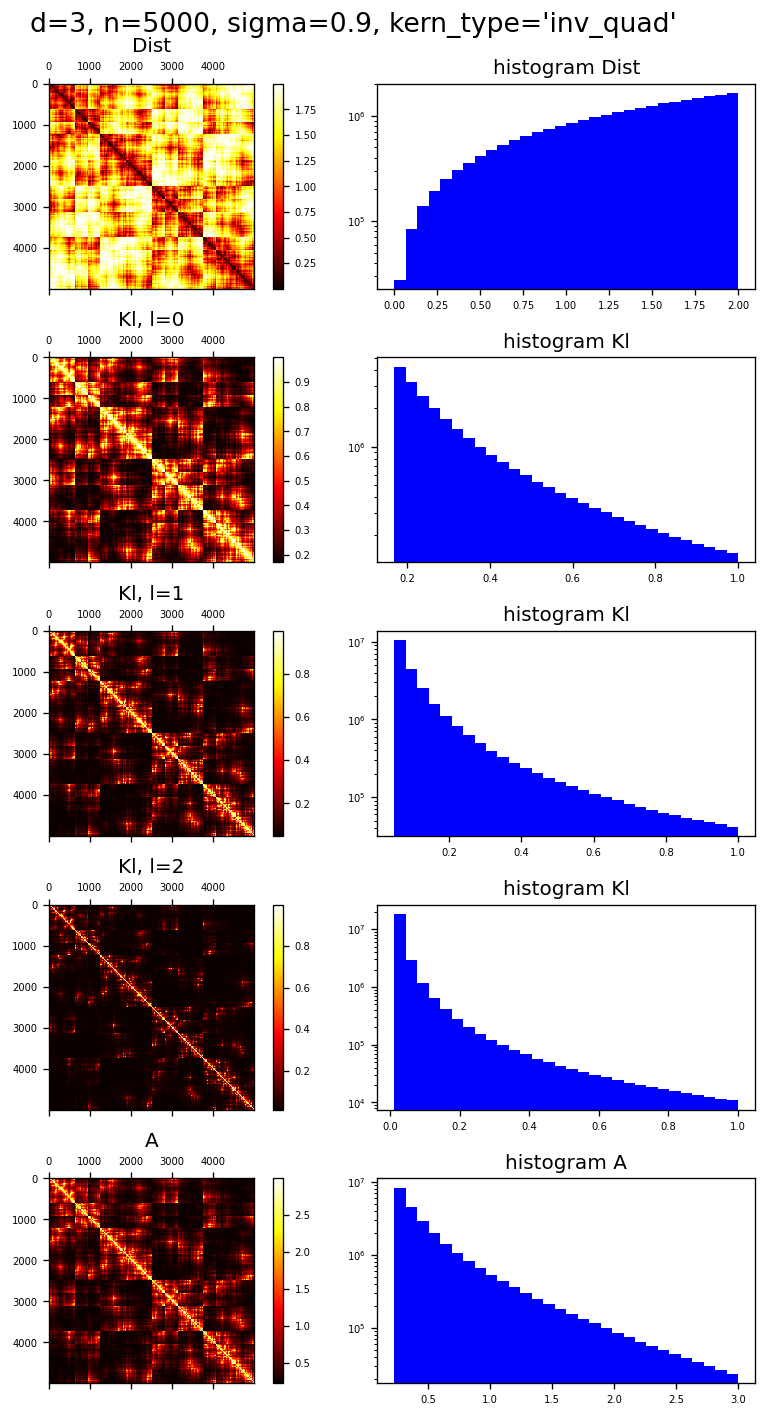

In [6]:
d = 3
sigma = 0.9
A, Dist = mf.radial_kernel_matrix(d, sigma, n, La, kerns[kern_type])
symm = False
num_levels = int(np.ceil(np.log2(min(m, n))) + 1)
hpart = mf.hpart_dist_clustering(Dist, num_levels, symm=symm, grref_max_iters=grref_max_iters)
A = A[hpart['rows']['pi'], :][:, hpart['cols']['pi']]
Dist = Dist[hpart['rows']['pi'], :][:, hpart['cols']['pi']]

mf.plot_hist_rad_kern_matrices(A, Dist, La, kerns[kern_type], kern_type, d, n, sigma)

(array([ 512098, 1530841, 2550198, 3574017, 4592301, 5607045, 6633500]), array([4.26649713e-04, 2.86079982e-01, 5.71733315e-01, 8.57386647e-01,
       1.14303998e+00, 1.42869331e+00, 1.71434664e+00, 1.99999998e+00]))


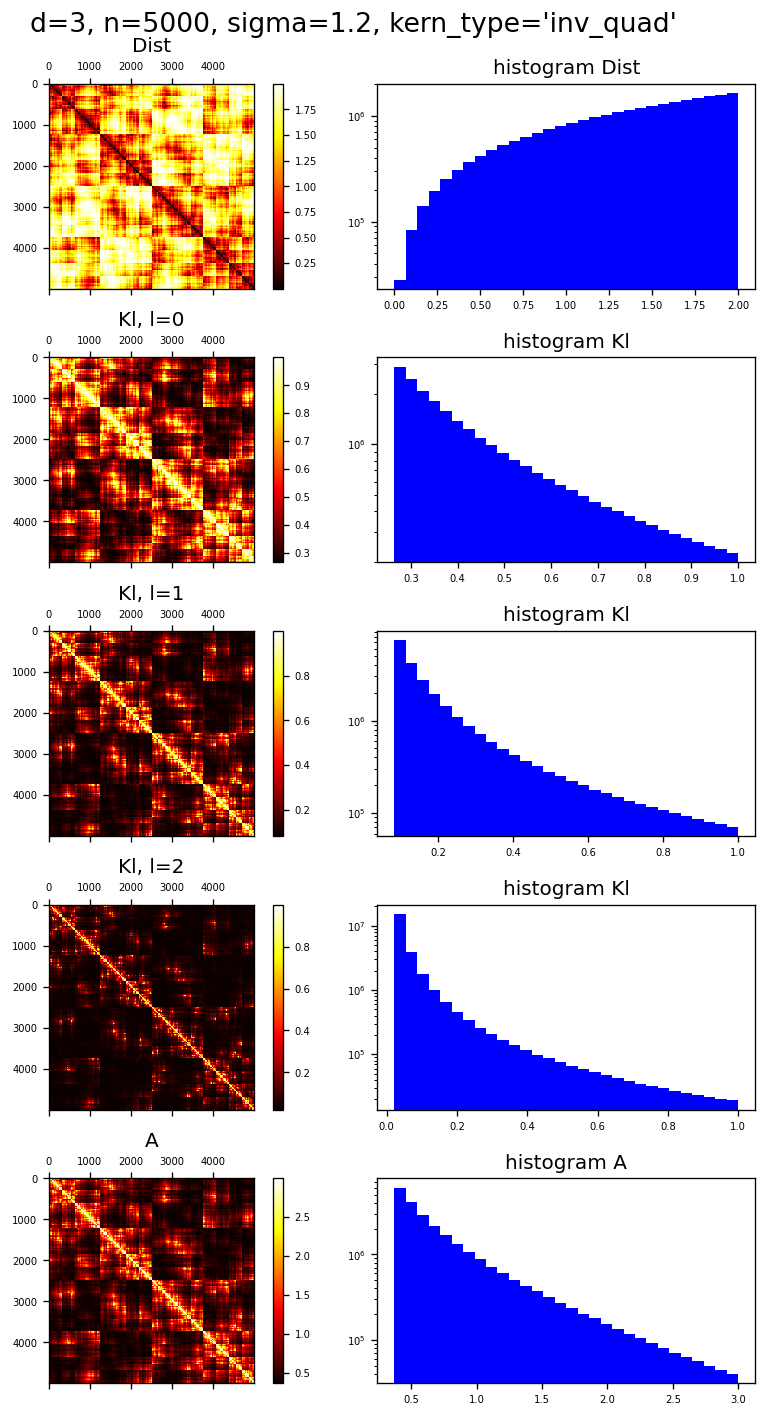

In [7]:
d = 3
sigma = 1.2
A, Dist = mf.radial_kernel_matrix(d, sigma, n, La, kerns[kern_type])
symm = False
num_levels = int(np.ceil(np.log2(min(m, n))) + 1)
hpart = mf.hpart_dist_clustering(Dist, num_levels, symm=symm, grref_max_iters=grref_max_iters)
A = A[hpart['rows']['pi'], :][:, hpart['cols']['pi']]
Dist = Dist[hpart['rows']['pi'], :][:, hpart['cols']['pi']]

mf.plot_hist_rad_kern_matrices(A, Dist, La, kerns[kern_type], kern_type, d, n, sigma)